In [1]:
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

## Plotting Wigner functions
The following is an example of using the c2qa.util module to plot Wigner functions for a QisKit StateVector.

In [2]:
import c2qa
import qiskit

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)

### Initialize Fock state to zero

In [4]:
qmr0 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qr0 = qiskit.QuantumRegister(size=1)
circuit0 = c2qa.CVCircuit(qmr0, qr0)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit0.initialize([1,0], qr0[0])
# circuit0.initialize([0,1], qr0[0])

# Initialize the qumode to a zero Fock sate
circuit0.cv_initialize(0, qmr0[0])

# ... Your circtuit here ...

state0, _, _ = c2qa.util.simulate(circuit0)
print(state0)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [5]:
# c2qa.wigner.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.trace_out_qubits(circuit0, state0))

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


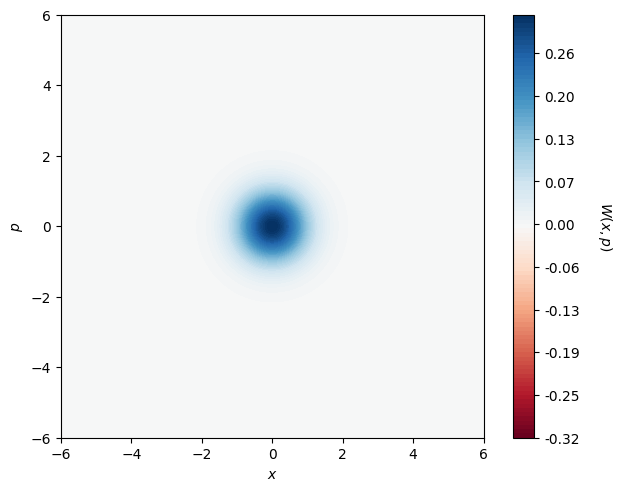

In [6]:
c2qa.wigner.plot_wigner(circuit0, state0)

### Initialize Fock state to one

In [7]:
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qr1 = qiskit.QuantumRegister(size=1)
circuit1 = c2qa.CVCircuit(qmr1, qr1)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit1.initialize([1,0], qr1[0])
# circuit1.initialize([0,1], qr1[0])

# Initialize the qumode to a one Fock sate
circuit1.cv_initialize(1, qmr1[0])

# ... Your circtuit here ...

state1, _, _ = c2qa.util.simulate(circuit1)
print(state1)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [8]:
# c2qa.wigner.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.trace_out_qubits(circuit1, state1))

DensityMatrix([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


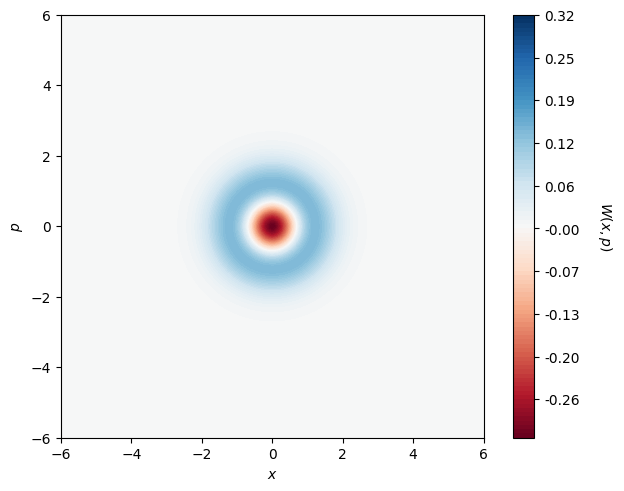

In [9]:
c2qa.wigner.plot_wigner(circuit1, state1)

### Displace the vaccuum and find that the cutoff is not sufficient

#### Insufficient cutoff

In [10]:
import numpy

In [11]:
qmr2 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qr2 = qiskit.QuantumRegister(size=1)
circuit2 = c2qa.CVCircuit(qmr2, qr2)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit2.initialize([1,0], qr2[0])
# circuit1.initialize([0,1], qr1[0])

# Initialize the qumode to a zero Fock sate (ie. the vaccuum)
circuit2.cv_initialize(0, qmr2[0])

# Displace the vaccuum using the displacement gate
# Displace the quasi-probability distribution along the position axis x with a real number
# circuit2.cv_d(numpy.pi/2,qmr1[0])
# Displace the quasi-probability distribution along the momentum axis with an imaginary number
circuit2.cv_d(numpy.pi/2*1j,qmr2[0])


state2, _, _ = c2qa.util.simulate(circuit2)
print(state2)

Statevector([ 0.27875462+0.j        ,  0.        +0.51187782j,
             -0.36358351+0.j        ,  0.        -0.72669388j,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


In [12]:
# c2qa.wigner.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.trace_out_qubits(circuit2, state2))

DensityMatrix([[ 0.07770414+0.j        ,  0.        -0.14268831j,
                -0.10135058+0.j        ,  0.        +0.20256928j],
               [ 0.        +0.14268831j,  0.2620189 +0.j        ,
                 0.        -0.18611034j, -0.37197848+0.j        ],
               [-0.10135058+0.j        ,  0.        +0.18611034j,
                 0.13219297+0.j        ,  0.        -0.26421391j],
               [ 0.        -0.20256928j, -0.37197848+0.j        ,
                 0.        +0.26421391j,  0.52808399+0.j        ]],
              dims=(2, 2))


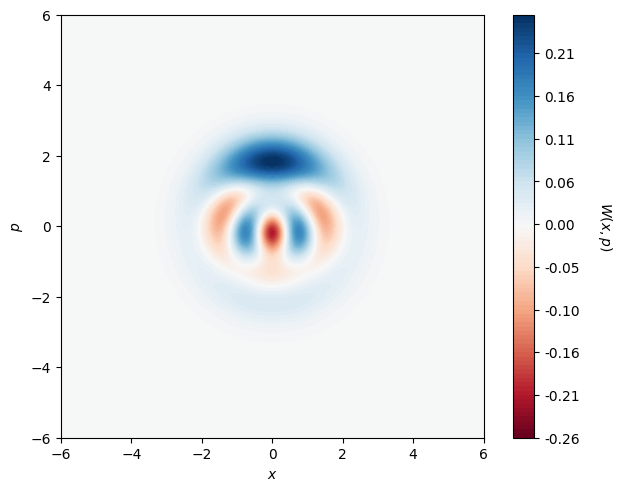

In [13]:
c2qa.wigner.plot_wigner(circuit2, state2)

# Not the expected behavior of displacing the vaccuum, which should simply shift the quasi-probability distribution without distorting it.

#### Sufficient cutoff

In [14]:
# Augment the number of qubits per mode
qmr3 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=6)
qr3 = qiskit.QuantumRegister(size=1)
circuit3 = c2qa.CVCircuit(qmr3, qr3)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit3.initialize([1,0], qr3[0])
# circuit1.initialize([0,1], qr1[0])

# Initialize the qumode to a zero Fock sate (ie. the vaccuum)
circuit3.cv_initialize(0, qmr3[0])

# Displace the vaccuum using the displacement gate
# Displace the quasi-probability distribution along the position axis x with a real number
# circuit2.cv_d(numpy.pi/2,qmr1[0])
# Displace the quasi-probability distribution along the momentum axis with an imaginary number
circuit3.cv_d(numpy.pi/2*1j,qmr3[0])

state3, _, _ = c2qa.util.simulate(circuit3)
occ =c2qa. util.stateread(state3, 1, 1, 6)

print(state3)

qumodes:  0  qubits:  0     with amplitude: 0.291 + i0.000 (big endian)
qumodes:  0  qubits:  0     with amplitude: 0.000 + i0.457 (big endian)
qumodes:  0  qubits:  0     with amplitude: -0.508 + i0.000 (big endian)
qumodes:  0  qubits:  0     with amplitude: 0.000 - i0.461 (big endian)
qumodes:  0  qubits:  0     with amplitude: 0.362 + i0.000 (big endian)
qumodes:  0  qubits:  0     with amplitude: 0.000 + i0.254 (big endian)
qumodes:  0  qubits:  0     with amplitude: -0.163 + i0.000 (big endian)
qumodes:  0  qubits:  0     with amplitude: 0.000 - i0.097 (big endian)
qumodes:  1  qubits:  0     with amplitude: 0.054 + i0.000 (big endian)
qumodes:  1  qubits:  0     with amplitude: 0.000 + i0.028 (big endian)
qumodes:  1  qubits:  0     with amplitude: -0.014 + i0.000 (big endian)
qumodes:  1  qubits:  0     with amplitude: 0.000 - i0.007 (big endian)
qumodes:  1  qubits:  0     with amplitude: 0.003 + i0.000 (big endian)
qumodes:  1  qubits:  0     with amplitude: 0.000 + i0.001 (b

In [15]:
# c2qa.wigner.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.trace_out_qubits(circuit3, state3))

DensityMatrix([[ 8.48049725e-02+0.00000000e+00j,
                 0.00000000e+00-1.33211339e-01j,
                -1.47960597e-01+0.00000000e+00j, ...,
                 0.00000000e+00-1.09396731e-31j,
                -2.17914529e-32+0.00000000e+00j,
                 0.00000000e+00+4.48291981e-33j],
               [ 0.00000000e+00+1.33211339e-01j,
                 2.09247882e-01+0.00000000e+00j,
                 0.00000000e+00-2.32415962e-01j, ...,
                 1.71839983e-31+0.00000000e+00j,
                 0.00000000e+00-3.42299342e-32j,
                -7.04175398e-33+0.00000000e+00j],
               [-1.47960597e-01+0.00000000e+00j,
                 0.00000000e+00+2.32415962e-01j,
                 2.58149228e-01+0.00000000e+00j, ...,
                 0.00000000e+00+1.90866232e-31j,
                 3.80198976e-32+0.00000000e+00j,
                 0.00000000e+00-7.82142215e-33j],
               ...,
               [ 0.00000000e+00+1.09396731e-31j,
                 1.71839983e-31

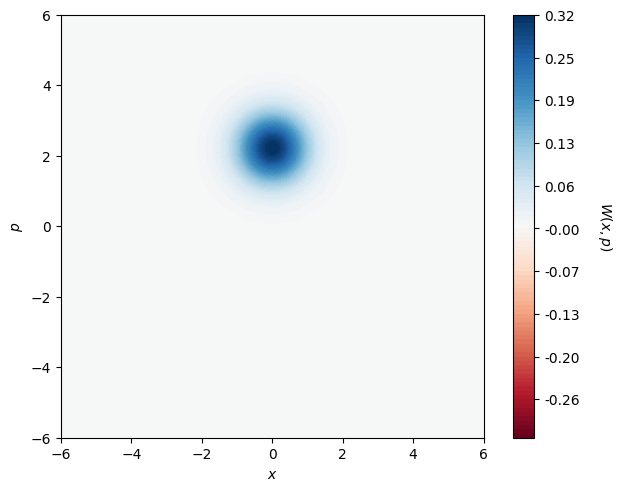

In [16]:
c2qa.wigner.plot_wigner(circuit3, state3)

# This is the expected behavior of displacing the vaccuum:
# a simple shift the quasi-probability distribution without distorting it, creating a coherent state.

# ECD

In [17]:
def cv_ecdX(qc, qbr, qmr, qm, alpha):
    qc.ry(-np.pi / 2, qbr[0])
    qc.cv_ecd(alpha/2, qmr[qm], qbr[0])
    qc.ry(np.pi / 2, qbr[0])
    return qc

def cv_ecdY(qc, qbr, qmr, qm, alpha):
    qc.rx(-np.pi / 2, qbr[0])
    qc.cv_ecd(alpha/2, qmr[qm], qbr[0])
    qc.rx(np.pi / 2, qbr[0])
    return qc

c:\Users\stav405\git\bosonic-qiskit\venv\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:602: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
c:\Users\stav405\git\bosonic-qiskit\venv\Lib\site-packages\scipy\sparse\linalg\_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)
c:\Users\stav405\git\bosonic-qiskit\venv\Lib\site-packages\qutip\wigner.py:520: RuntimeWarning: overflow encountered in multiply
  return y0 - y1 * ((L + 1) - x) * (L + 1)**-0.5
c:\Users\stav405\git\bosonic-qiskit\venv\Lib\site-packages\qutip\wigner.py:520: RuntimeWarning: invalid value encountered in multiply
  return y0 - y1 * ((L + 1) - x) * (L + 1)**-0.5
c:\Users\stav405\git\bosonic-qiskit\venv\Lib\site-packages\qutip\wigner.py:518: RuntimeWarning: overflow encountered in multiply
  y0 - y1 * ((L + 2*k -1) - x) * ((L+k)*k)**-0.5
c:\Users\stav405\git\bosonic-qiskit\venv\Lib\site-package

ValueError: Axis limits cannot be NaN or Inf

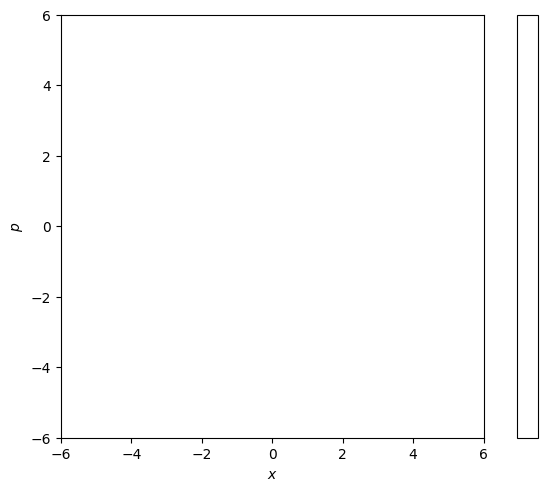

In [18]:
import numpy as np

# Augment the number of qubits per mode
qmr = c2qa.QumodeRegister(num_qumodes=2, num_qubits_per_qumode=6)
qbr = qiskit.QuantumRegister(size=1)
qc = c2qa.CVCircuit(qmr, qbr)

# Initialize your qubit (should have no effect on Fock state Wigner function)
qc.initialize([1,0], qbr[0])

# initialise in x (just h) or y eigenstate
qc.h(qbr[0])
qc.rz(np.pi/2,qbr[0])

# Initialize the qumode to a zero Fock sate (ie. the vaccuum)
qc.cv_initialize(0, qmr[0])
qc.cv_initialize(0, qmr[1])

alpha = 1j/2
qc = cv_ecdX(qc, qbr, qmr, 0, alpha)
qc = cv_ecdY(qc, qbr, qmr, 1, alpha)
qc = cv_ecdX(qc, qbr, qmr, 0, -alpha)
qc = cv_ecdY(qc, qbr, qmr, 1, -alpha)
alpha = 1/2
qc = cv_ecdX(qc, qbr, qmr, 0, alpha)
qc = cv_ecdY(qc, qbr, qmr, 1, alpha)
qc = cv_ecdX(qc, qbr, qmr, 0, -alpha)
qc = cv_ecdY(qc, qbr, qmr, 1, -alpha)

state, _, _ = c2qa.util.simulate(qc)

# # c2qa.wigner.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
# print(c2qa.util.trace_out_qubits(qc, state))

c2qa.wigner.plot_wigner(qc, state, method="iterative")